### Setup

In [10]:
# Imports
import numpy as np
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from data import Faultcreep
from data import Ridgecrest
from data import Kilauea

# Variables for execution
dataset = "S1-GUNW-D-R-071-tops-20190716_20190610-135212-36450N_34472N-PP-f29b-v2_0_2.nc"
shouldDownload = False
buildTimeline = True

### Download Data

In [11]:
# Create temp dir (if required) and cd in
path = './temp'
if not os.path.exists(path):
    os.mkdir(path)
os.chdir(path)

# Run download if required
if(shouldDownload):
    Faultcreep.download()
    Ridgecrest.download()
    Kilauea.download()

# Return to correct folder
os.chdir("../")

### Open the .nc file

In [12]:
fp = f"./temp/{dataset}"
nc = netCDF4.Dataset(fp)

### Extract Data
This is just a subscript that we used for testing how to extract data from the dataset.

In [13]:
#print(nc.groups['science'])
#print(nc.groups['science'].groups['grids'])
#print(nc.groups['science'].groups['grids'].groups['corrections'])
#print(nc.groups['science'].groups['grids'].groups['corrections'].groups['derived'])
#print(nc.groups['science'].groups['grids'].groups['data'])
#print(nc.groups['science'].groups['grids'].groups['data'].variables['latitude'][:].data.size)
#print(nc.groups['science'].groups['radarMetaData'])
#print(nc.groups['science'].groups['radarMetaData'].groups['inputSLC'])

print(nc.groups['science'].groups['radarMetaData'].variables['wavelength'][:].data)
print(nc.groups['science'].groups['radarMetaData'].variables['slantRangeStart'][:].data)

0.05546576
799611.1


### Read Dataset File

In [14]:
lat_array = nc.groups['science'].groups['grids'].groups['data'].variables['latitude'][:].data
lon_array = nc.groups['science'].groups['grids'].groups['data'].variables['longitude'][:].data
image_extent = [np.min(lon_array),np.max(lon_array),np.min(lat_array),np.max(lat_array)]
wavelength = float(nc.groups['science'].groups['radarMetaData'].variables['wavelength'][:].data) * 100 #centimeters

mask_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].mask
unwrapped_phase_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].data    
coherence_mat = nc.groups['science'].groups['grids'].groups['data'].variables['coherence'][:].data    
amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['amplitude'][:].data    
cc_mat = amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['connectedComponents'][:].data  
nc.close()

### Filter by coherence

In [15]:
coherence_threshold = 0.5
inds_to_keep = (~mask_mat)* (coherence_mat>coherence_threshold)
mat_shape = inds_to_keep.shape
amp = np.zeros(mat_shape) + np.nan
amp[inds_to_keep] = amplitude_mat[inds_to_keep]
phase = np.zeros(mat_shape) + np.nan
phase[inds_to_keep] = unwrapped_phase_mat[inds_to_keep]
coherence = np.zeros(mat_shape) + np.nan
coherence[inds_to_keep] = coherence_mat[inds_to_keep]
connected_components = np.zeros(mat_shape) -1
connected_components[inds_to_keep] = cc_mat[inds_to_keep]

cc_uniq=np.unique(connected_components[connected_components>=0])
N_cc = len(cc_uniq)
cc2ind_dict = dict(zip(cc_uniq,np.arange(N_cc)))
cc2ind_dict[-1]=np.nan
connected_components=np.vectorize(cc2ind_dict.__getitem__)(connected_components)

phase_cm_units = wavelength * phase / (2*np.pi)

### Display Graphs

C:\Users\samin\AppData\Local\Temp\ipykernel_19136\1672107253.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)
C:\Users\samin\AppData\Local\Temp\ipykernel_19136\1672107253.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
C:\Users\samin\AppData\Local\Temp\ipykernel_19136\1672107253.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)


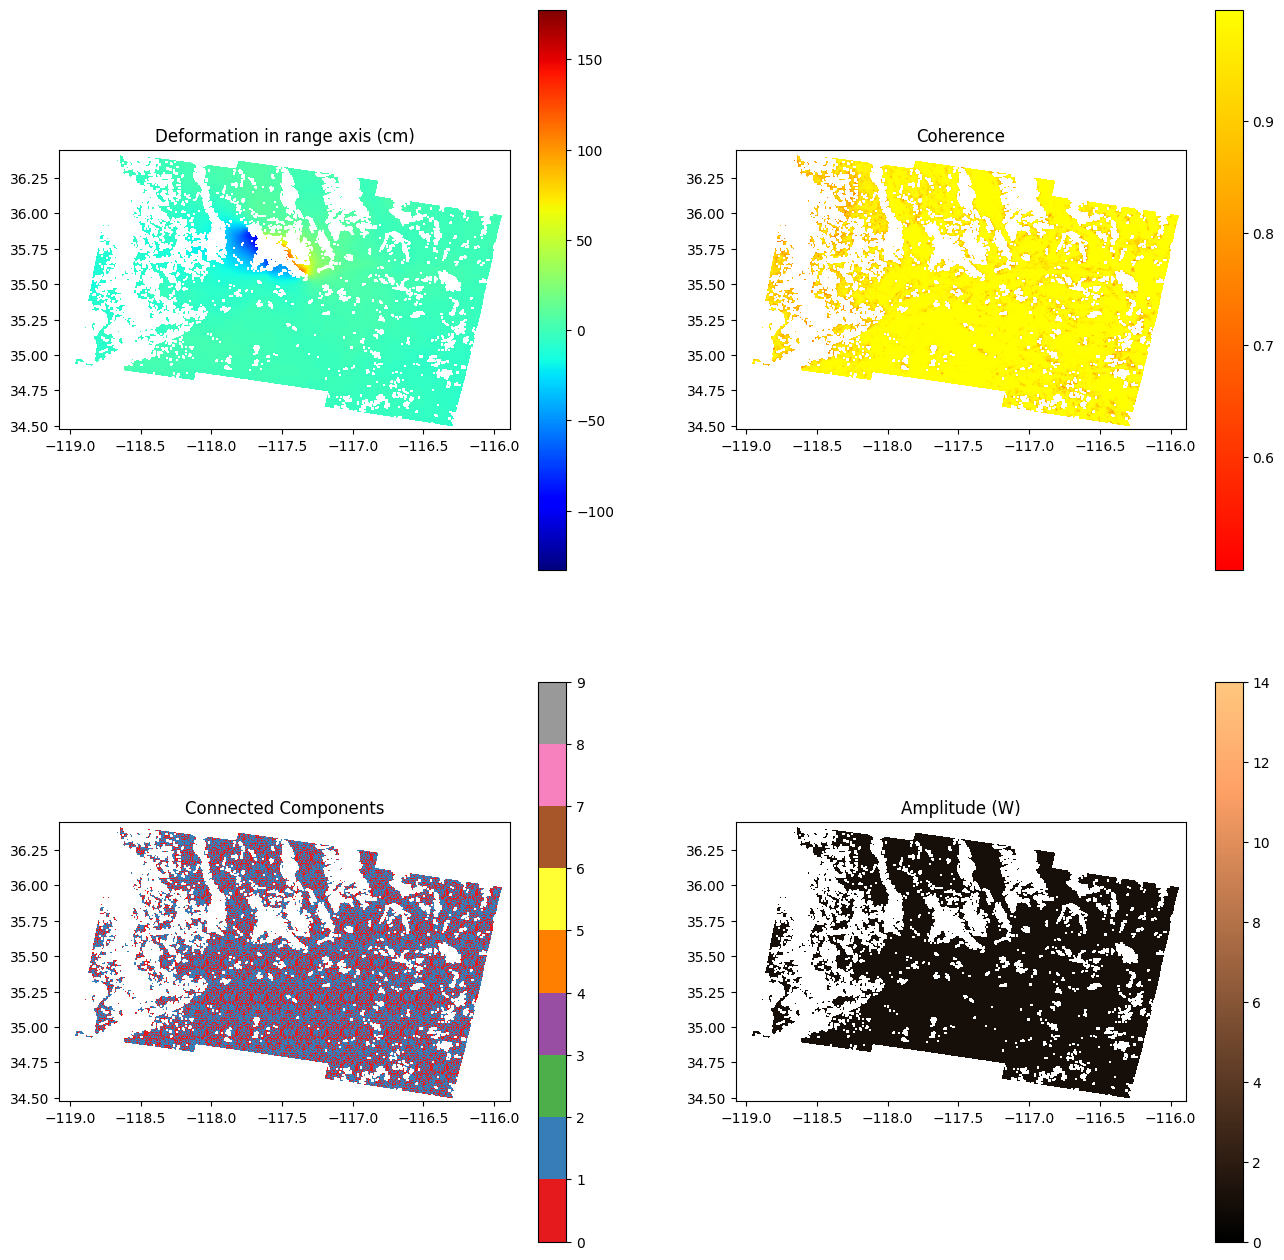

In [16]:
%matplotlib inline

fig,ax=plt.subplots(2,2,figsize = (16,16))

# Deformation
ax1=plt.subplot(2,2,1)
plt.imshow(phase_cm_units,extent = image_extent)
plt.set_cmap('jet')
plt.colorbar()
ax1.set_title('Deformation in range axis (cm)')

# Coherence
ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)
plt.imshow(coherence,extent = image_extent)
plt.set_cmap('autumn')
ax2.set_title('Coherence')
plt.colorbar()

# Connected components?
ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
plt.imshow(connected_components,extent = image_extent)
plt.set_cmap('Set1')
ax3.set_title('Connected Components')
plt.colorbar()

# Amplitude
ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)
plt.imshow(amp,extent = image_extent)
plt.set_cmap('copper')
ax4.set_title('Amplitude (W)')

_ = plt.colorbar()

### Export Plot

In [17]:
path = './output'
if not os.path.exists(path):
    os.mkdir(path)

os.chdir(path)
fig.savefig(f"{dataset}.pdf", format="pdf", bbox_inches="tight")
os.chdir("../")

### Build & Export Timespan

amplitude is being ignored
coherence is being ignored
connectedComponents is being ignored
S1-GUNW-D-R-071-tops-20190716_20180627-135212-36450N_34472N-PP-b69d-v2_0_2.nc


C:\Users\samin\AppData\Local\Temp\ipykernel_19136\2284062977.py:62: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)
C:\Users\samin\AppData\Local\Temp\ipykernel_19136\2284062977.py:69: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
C:\Users\samin\AppData\Local\Temp\ipykernel_19136\2284062977.py:76: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)


S1-GUNW-D-R-071-tops-20190716_20180814-135212-00119W_00034N-PP-3114-v2_0_5.nc
S1-GUNW-D-R-071-tops-20190716_20190610-135212-36450N_34472N-PP-f29b-v2_0_2.nc
S1-GUNW-D-R-071-tops-20190716_20190622-135212-36450N_34472N-PP-7915-v2_0_2.nc
S1-GUNW-D-R-071-tops-20190716_20190704-135212-36450N_34472N-PP-bf9f-v2_0_2.nc
S1-GUNW-D-R-071-tops-20190728_20180627-135213-36450N_34472N-PP-a1ea-v2_0_2.nc
S1-GUNW-D-R-071-tops-20190728_20180826-135212-00119W_00034N-PP-2d1f-v2_0_5.nc
S1-GUNW-D-R-071-tops-20190728_20190622-135213-36450N_34472N-PP-b4b2-v2_0_2.nc
S1-GUNW-D-R-071-tops-20190728_20190704-135213-36450N_34472N-PP-9181-v2_0_2.nc
temp is being ignored
unwrappedPhase is being ignored


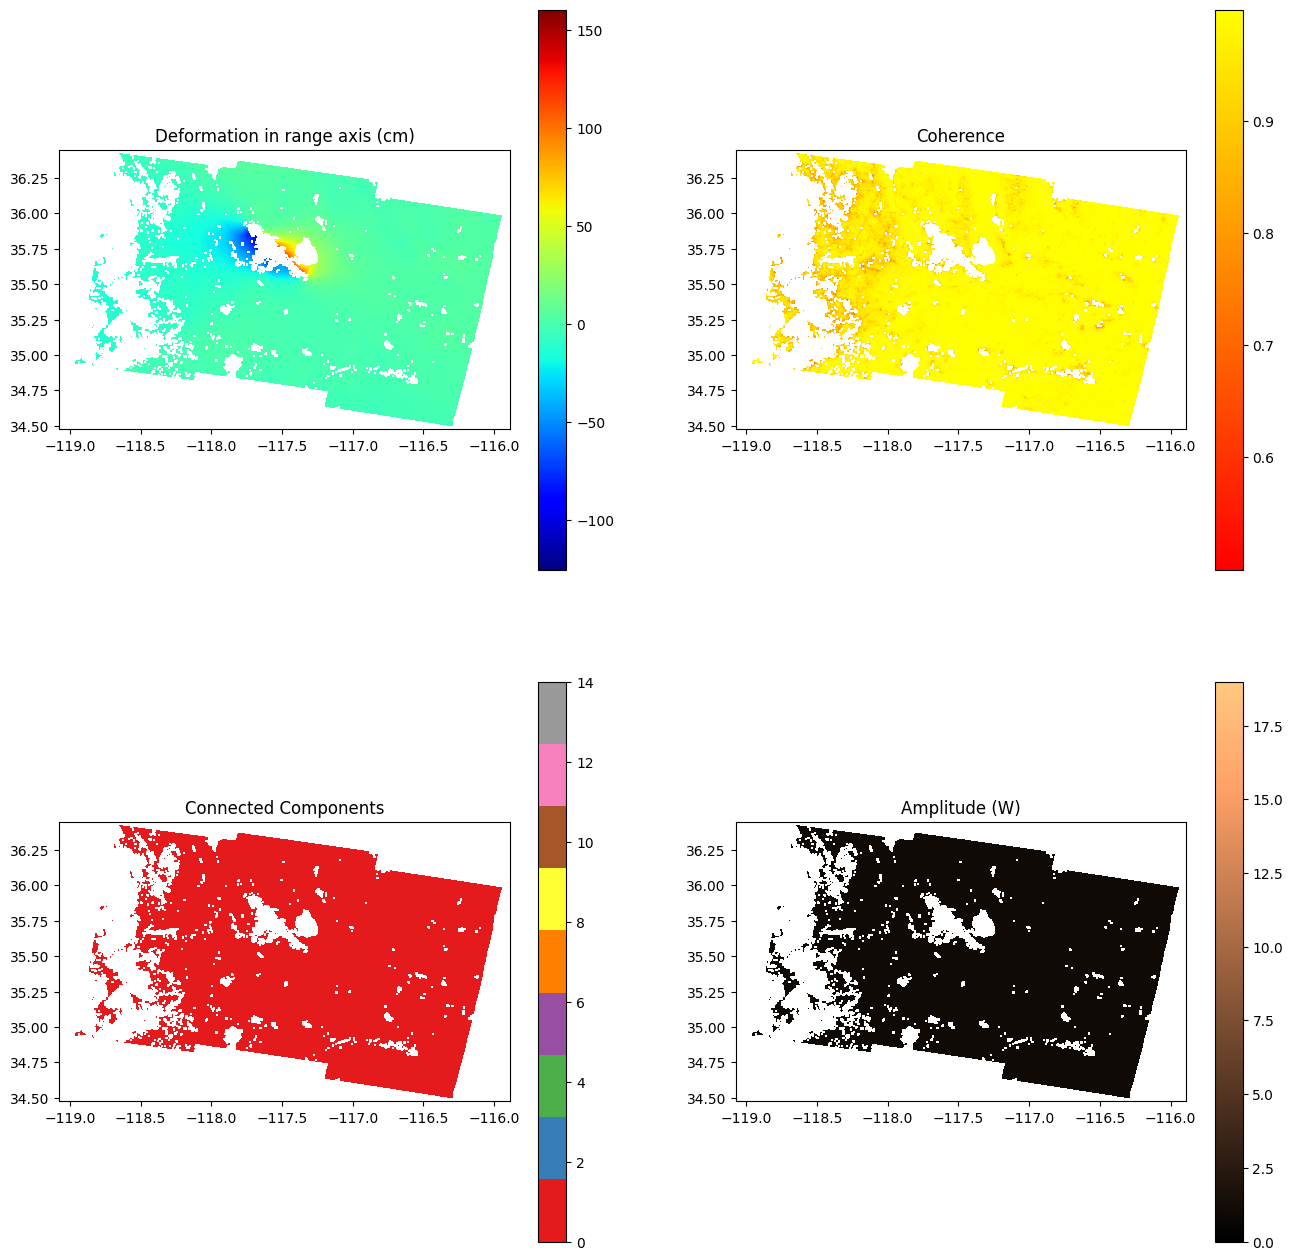

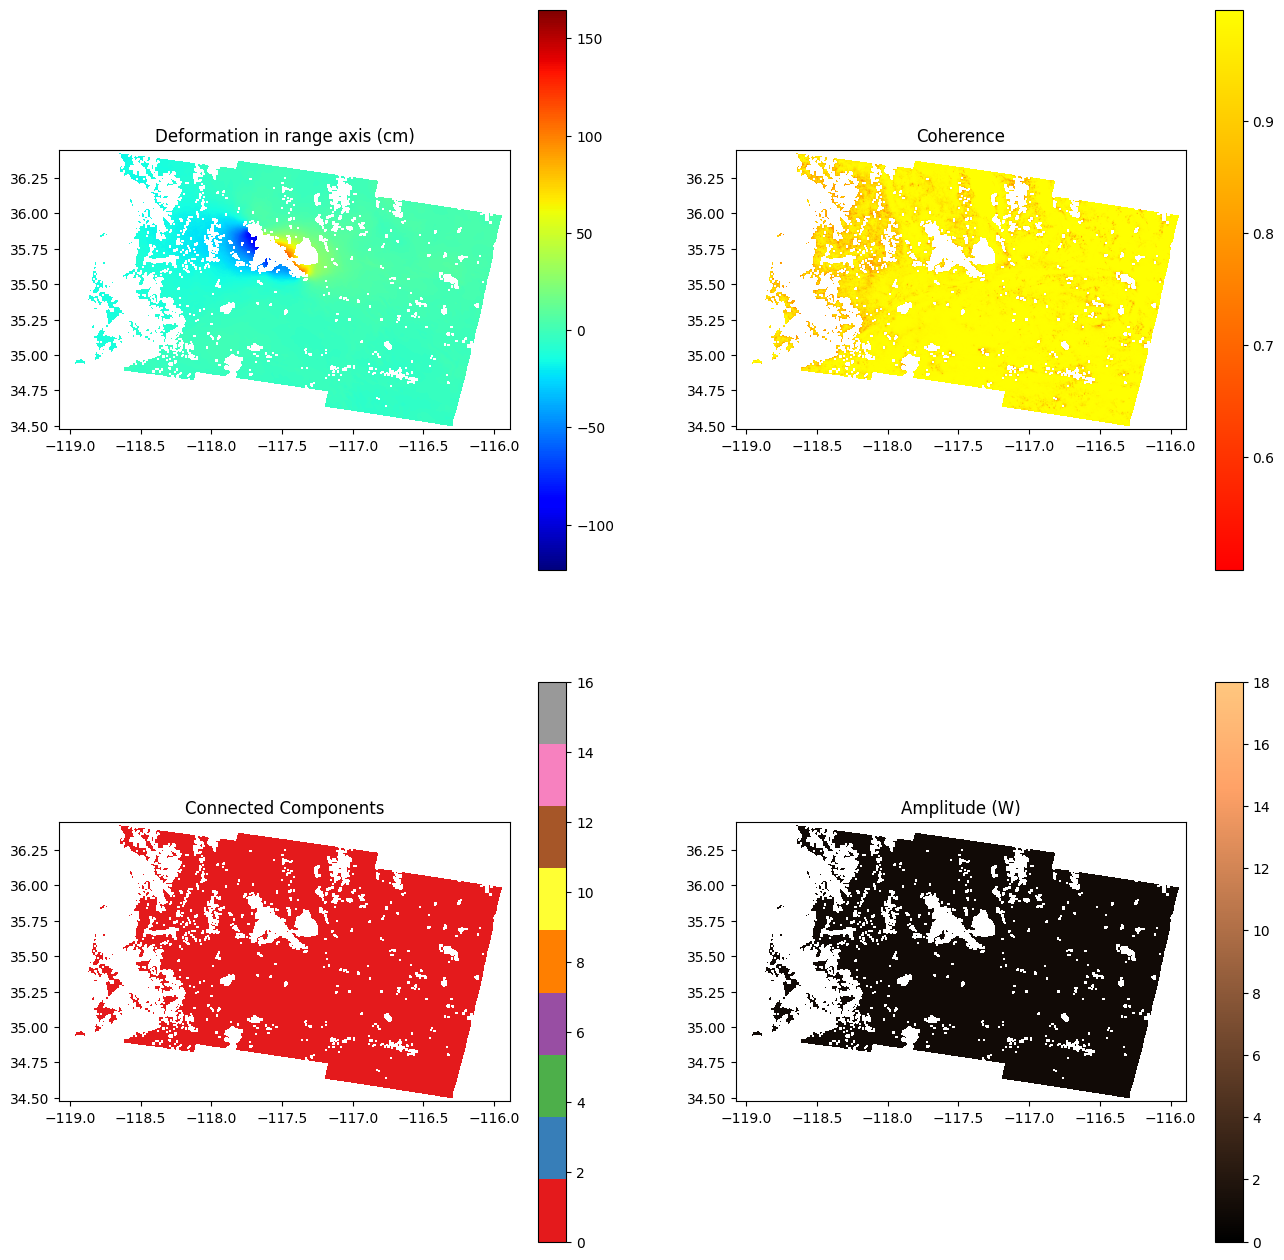

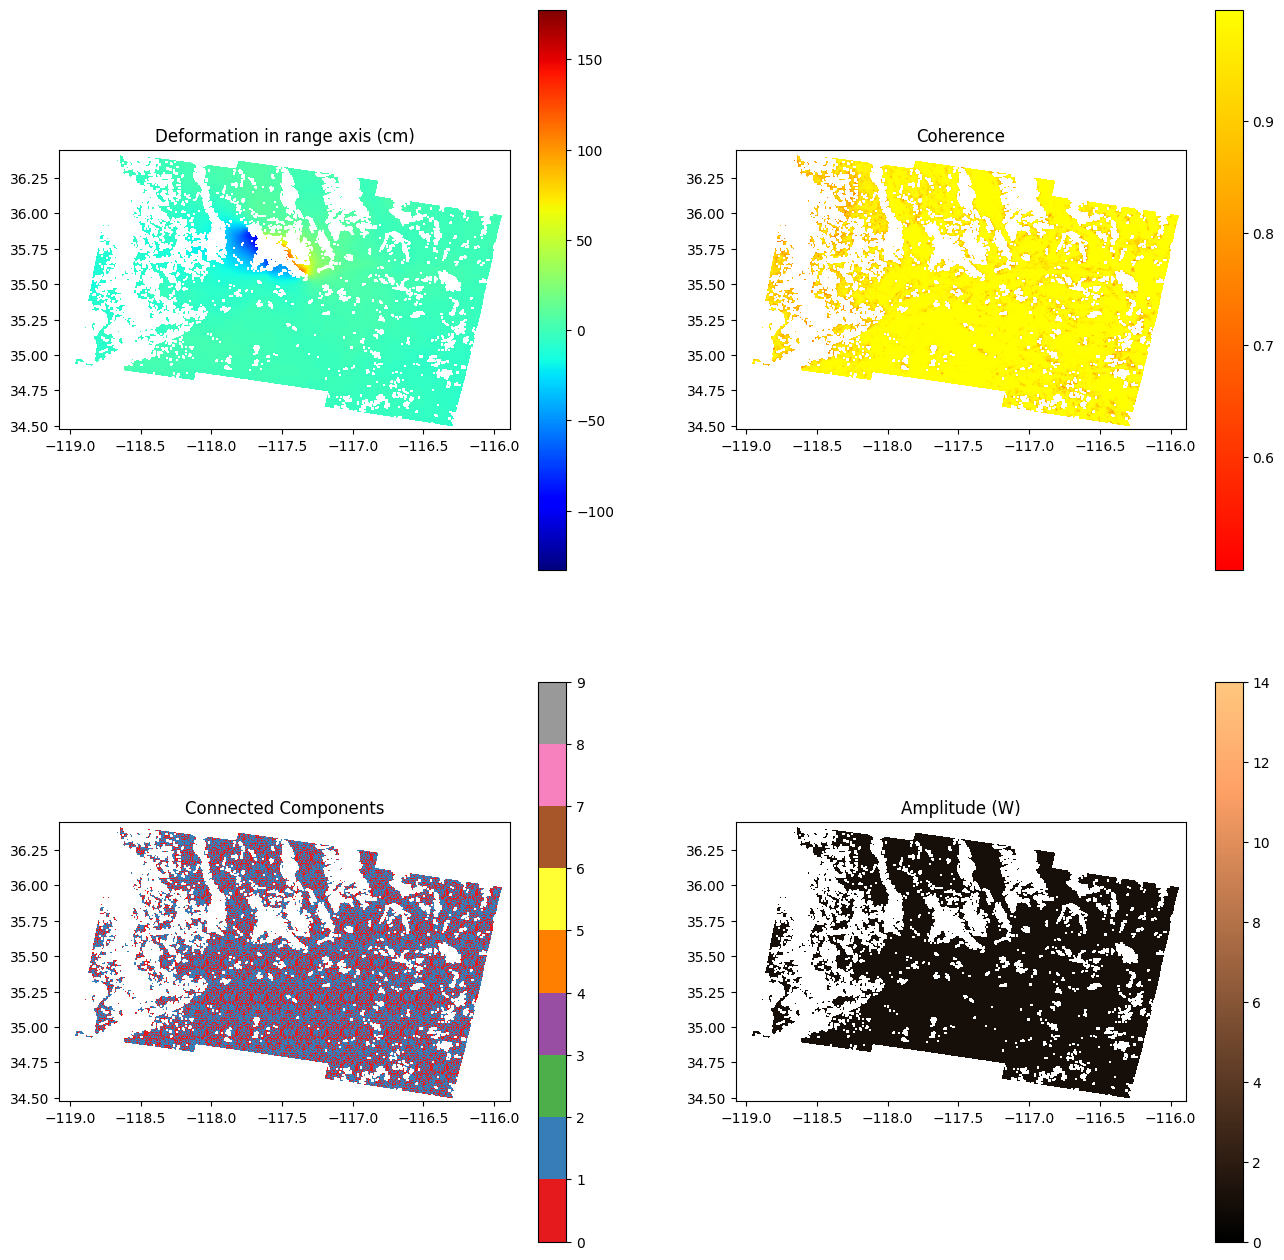

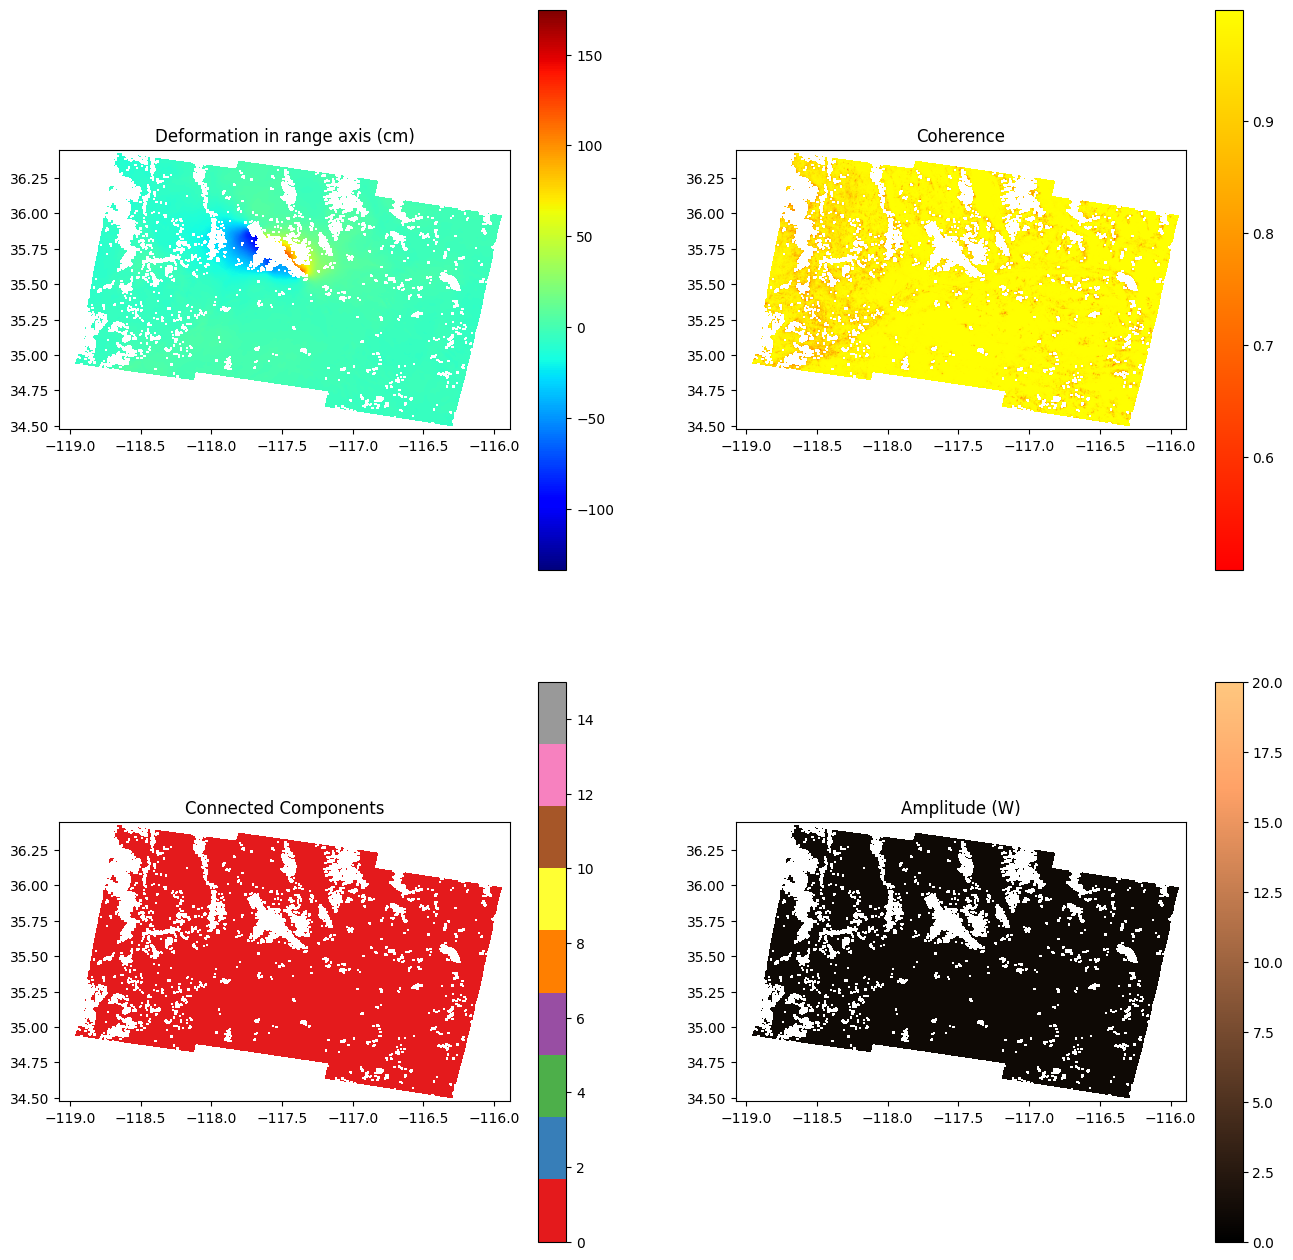

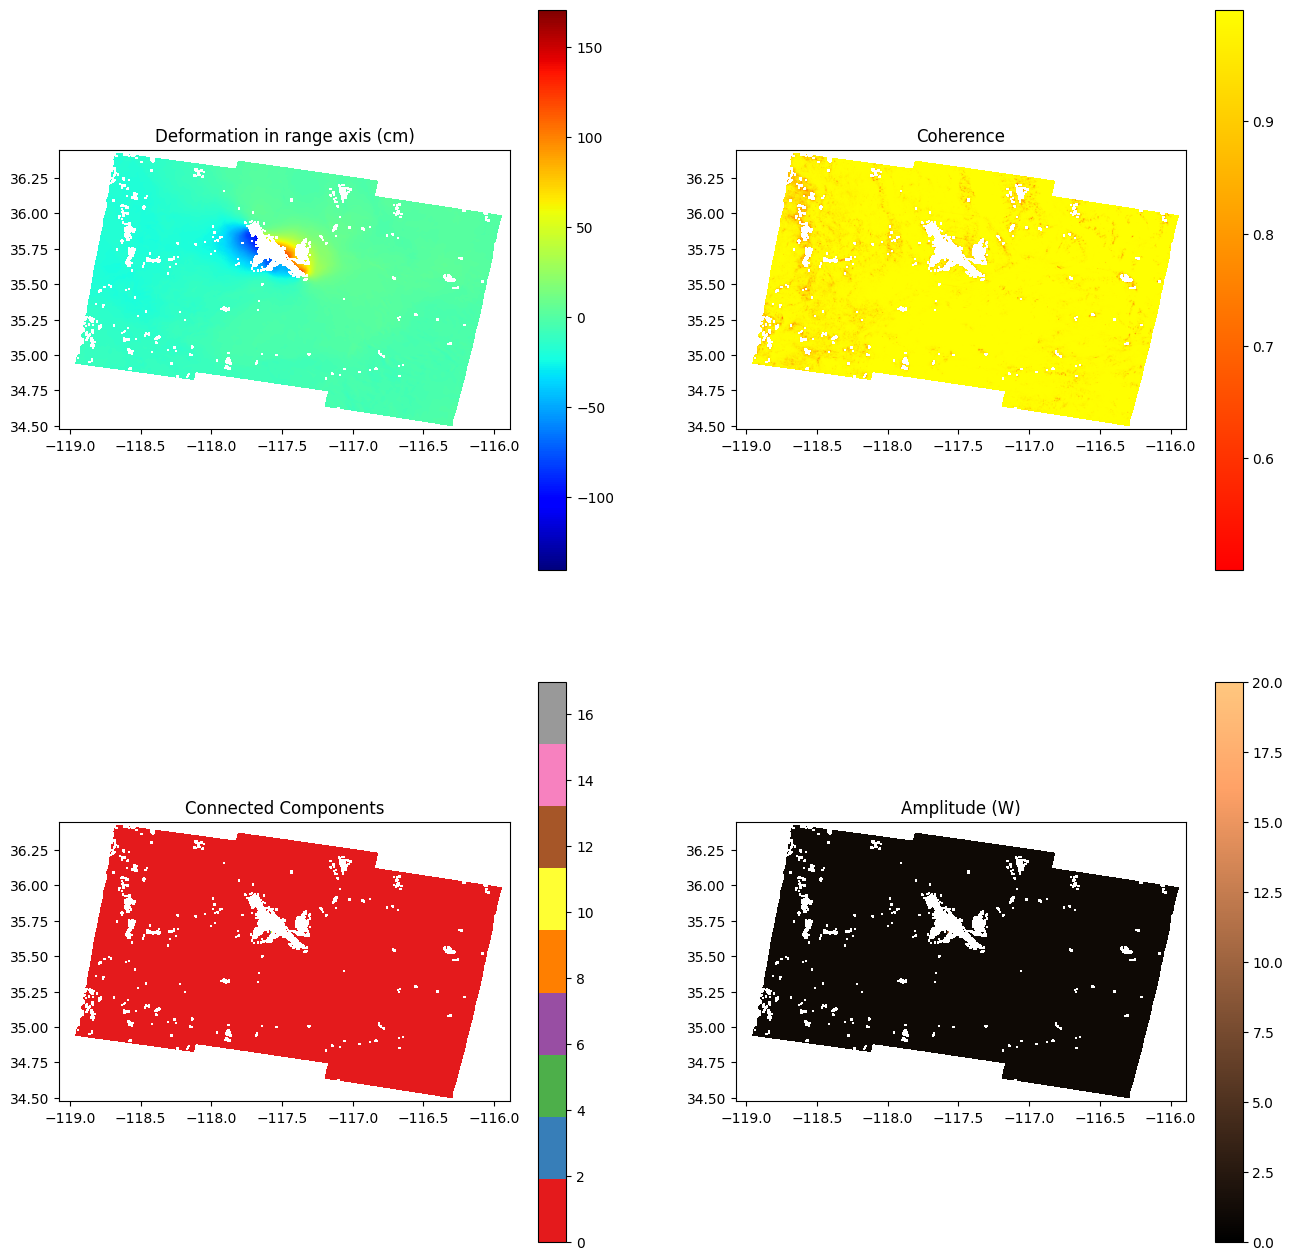

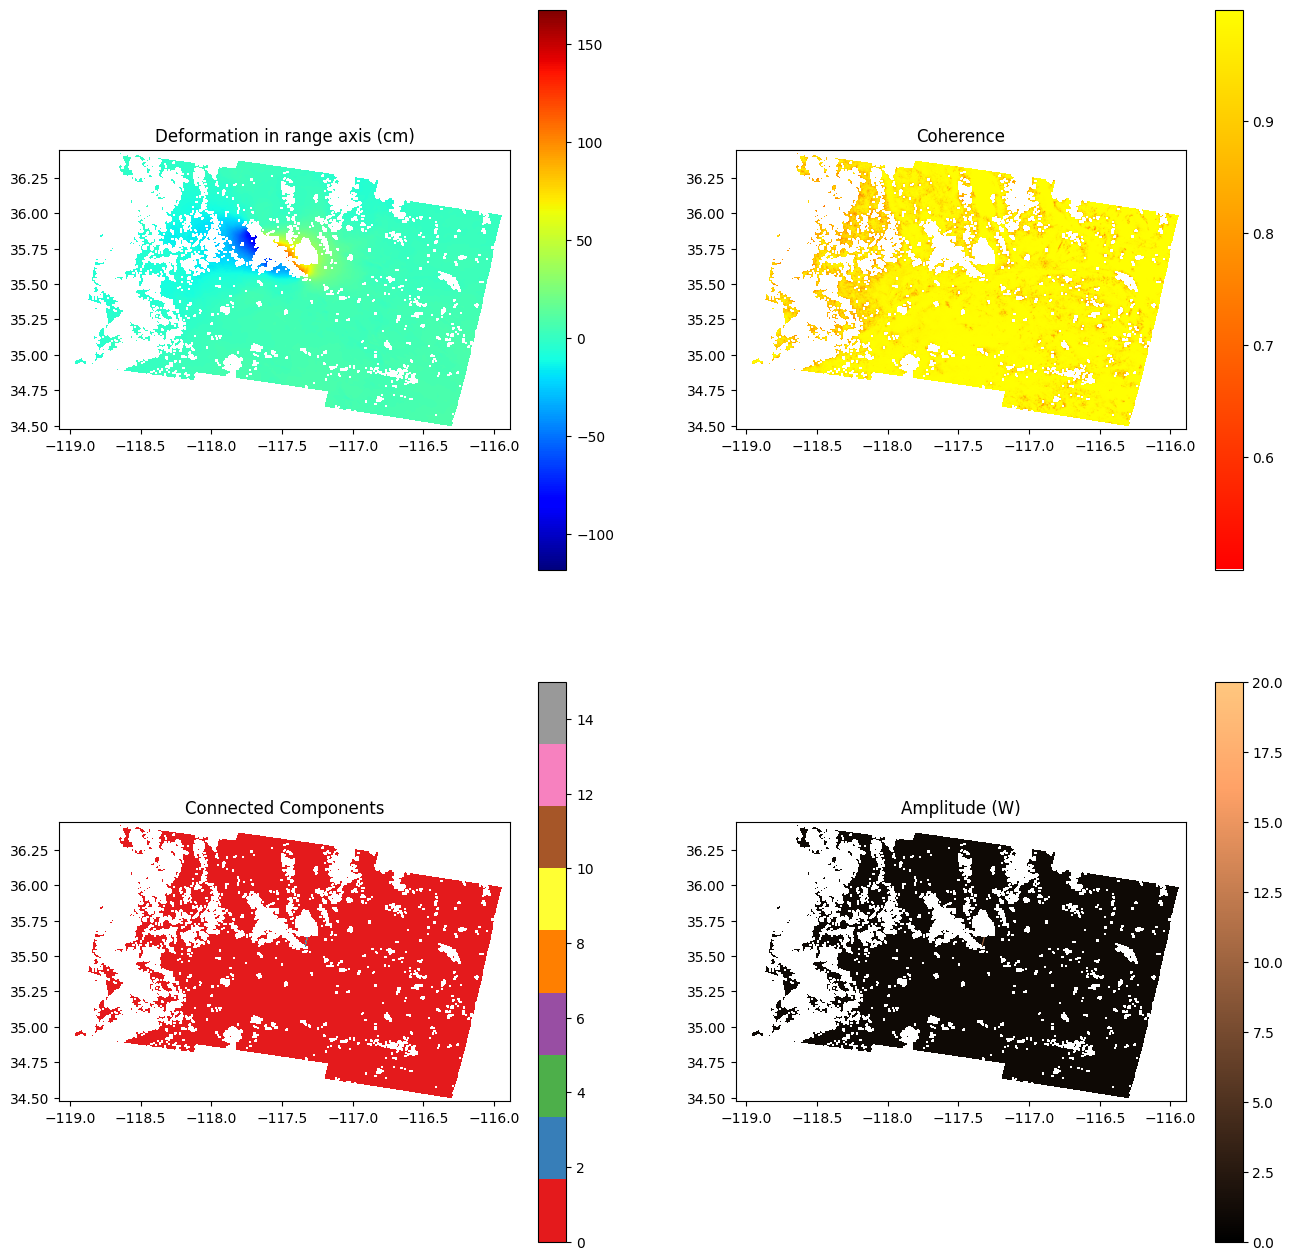

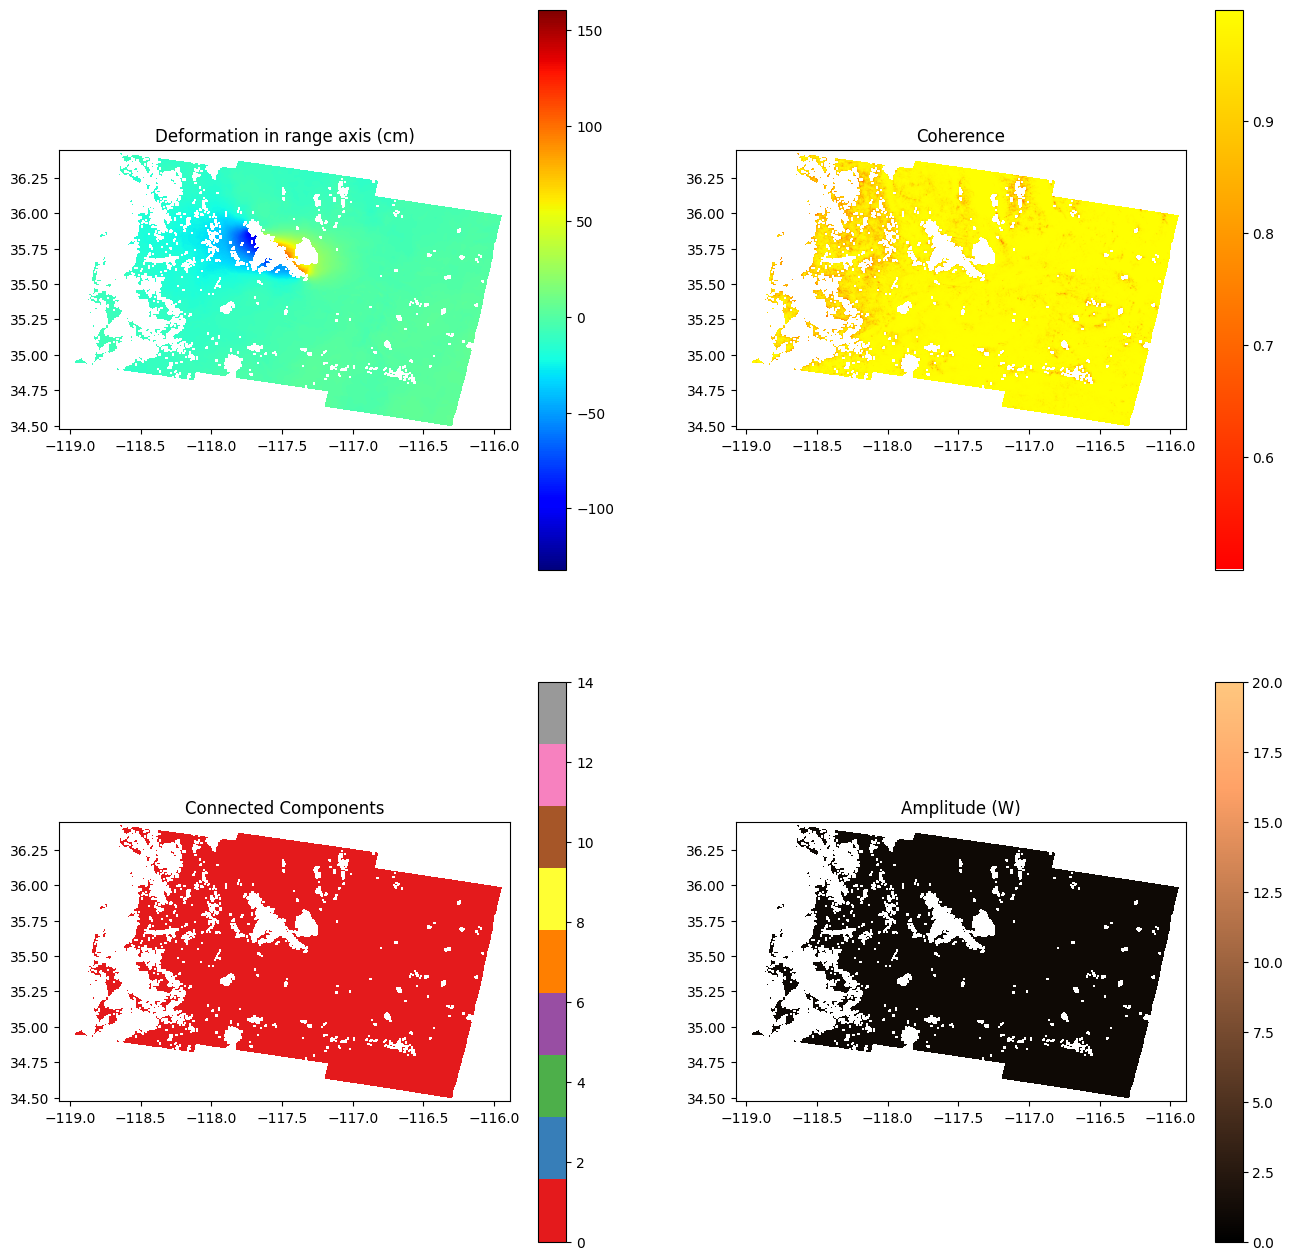

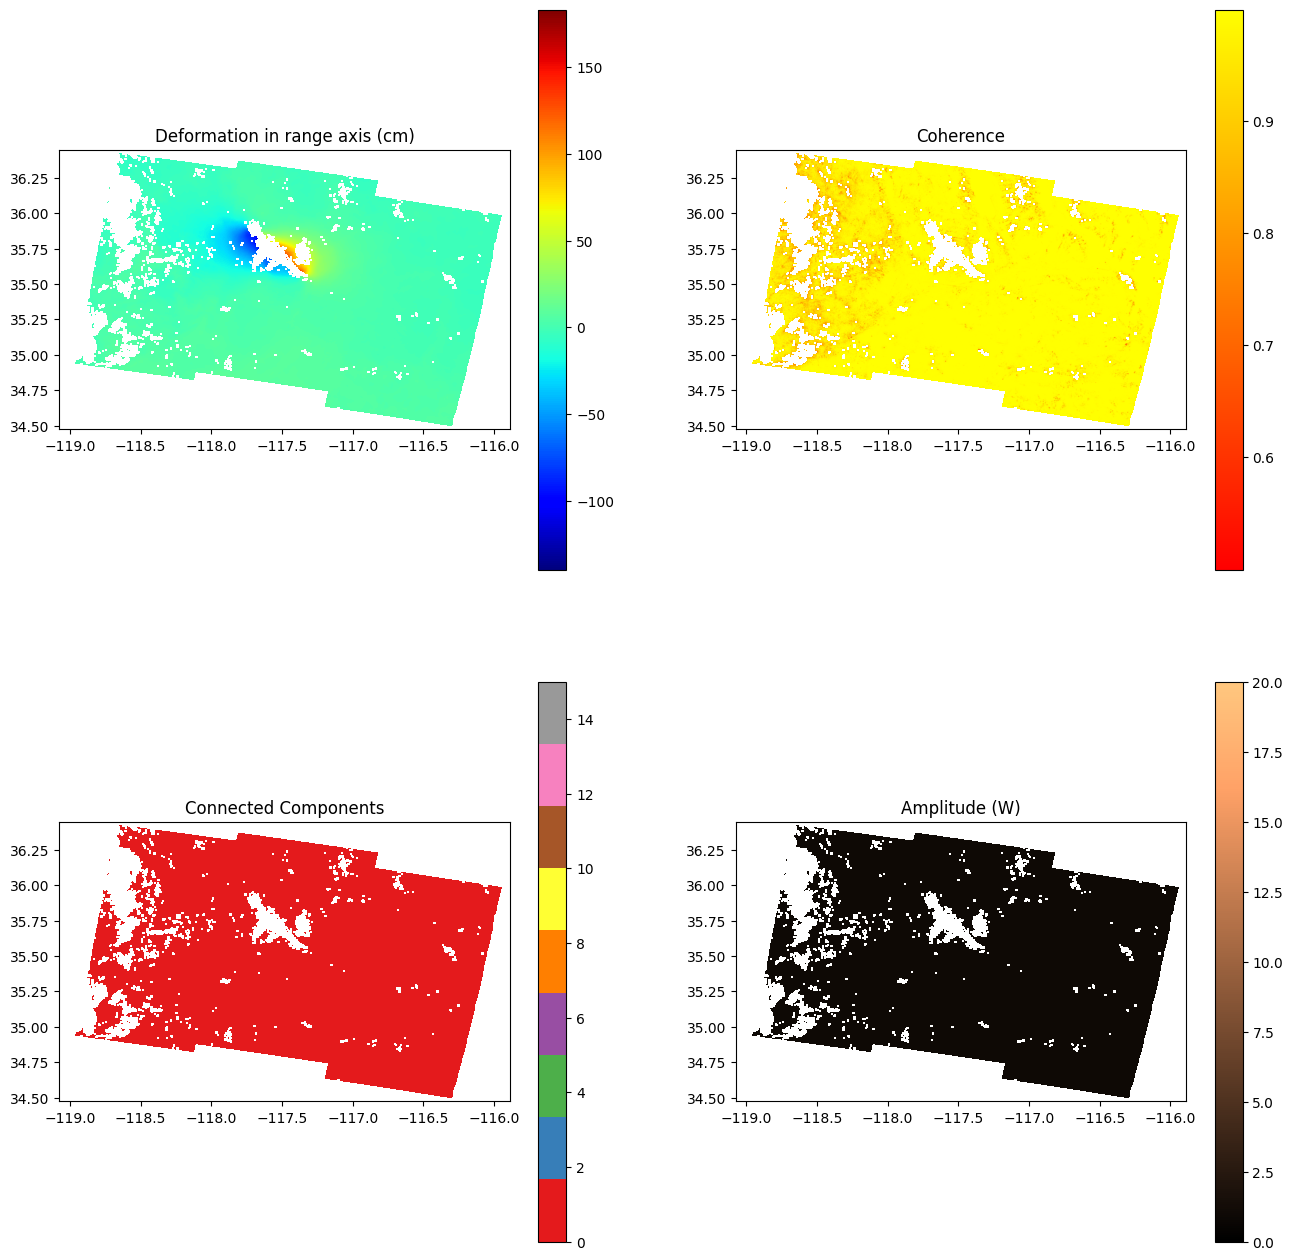

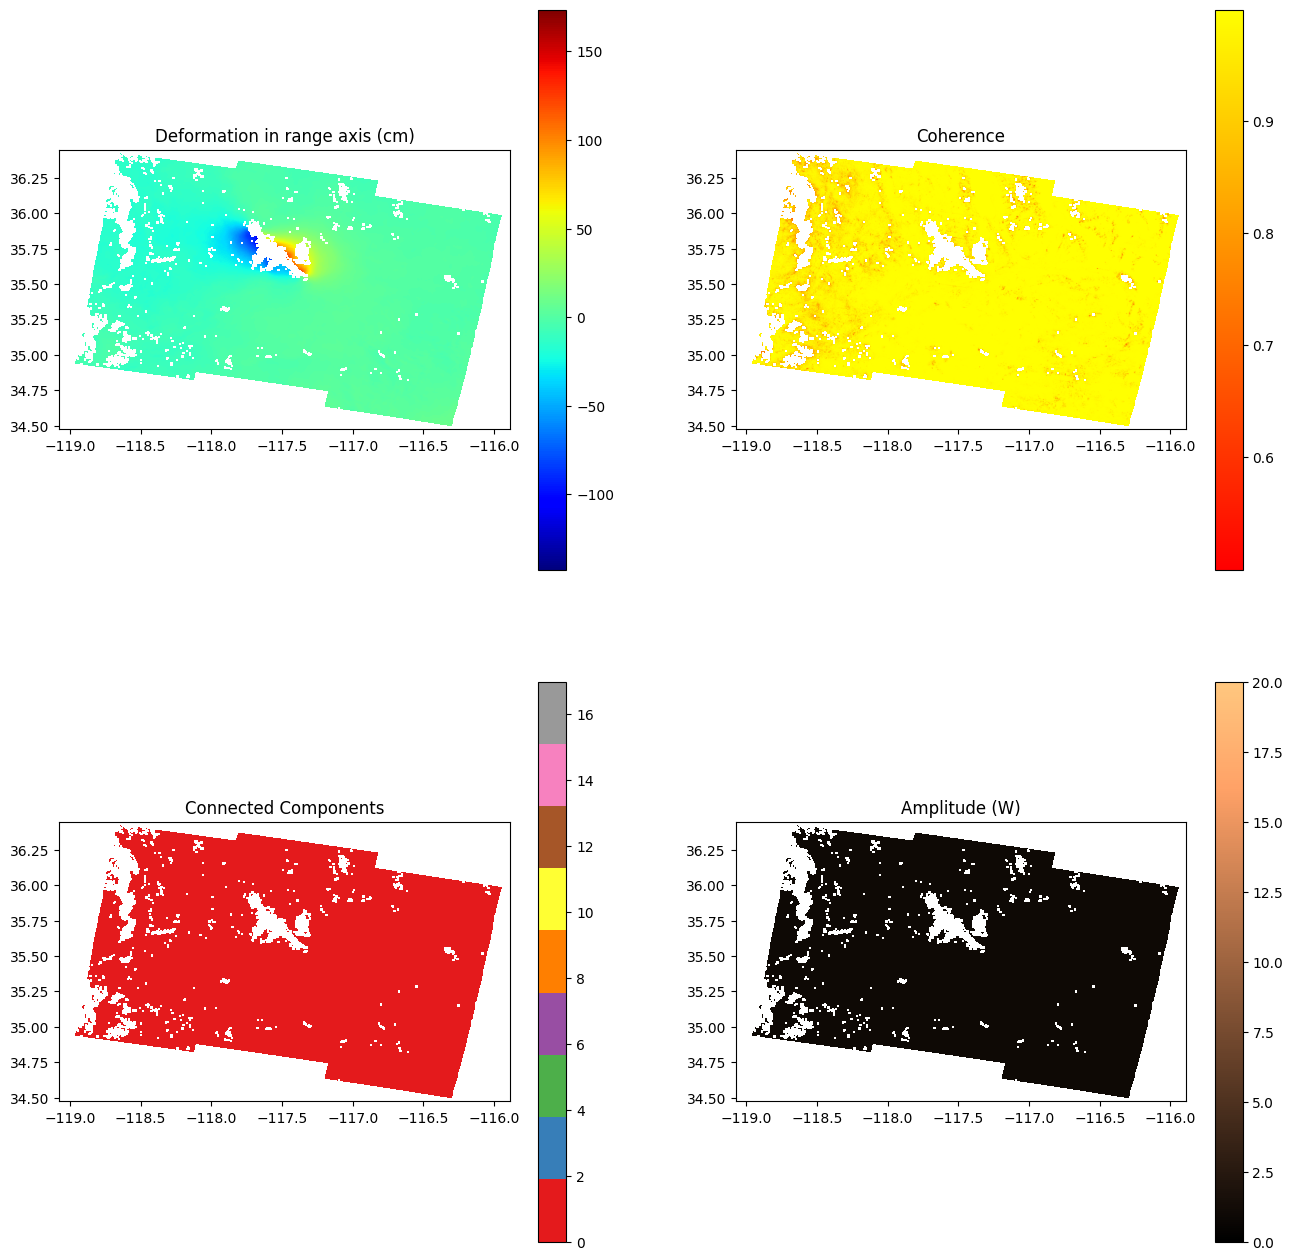

In [18]:
from os import listdir

if buildTimeline:
    path = './temp'
    os.chdir(path)

    for fp in listdir():
        if os.path.isdir(fp) or os.path.splitext(fp)[-1] != '.nc' :
            print(f"{fp} is being ignored")
            continue

        print(fp)

        # Reading the nc file and creating Dataset
        nc = netCDF4.Dataset(fp) 

        # Get arrays using dataset
        lat_array = nc.groups['science'].groups['grids'].groups['data'].variables['latitude'][:].data
        lon_array = nc.groups['science'].groups['grids'].groups['data'].variables['longitude'][:].data
        image_extent = [np.min(lon_array),np.max(lon_array),np.min(lat_array),np.max(lat_array)]
        wavelength = float(nc.groups['science'].groups['radarMetaData'].variables['wavelength'][:].data) * 100 #centimeters

        mask_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].mask
        unwrapped_phase_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].data    
        coherence_mat = nc.groups['science'].groups['grids'].groups['data'].variables['coherence'][:].data    
        amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['amplitude'][:].data    
        cc_mat = amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['connectedComponents'][:].data  
        nc.close()

        # Not sure what this does but i'll check it out later on :D
        coherence_threshold = 0.5
        inds_to_keep = (~mask_mat)* (coherence_mat>coherence_threshold)
        mat_shape = inds_to_keep.shape
        amp = np.zeros(mat_shape) + np.nan
        amp[inds_to_keep] = amplitude_mat[inds_to_keep]
        phase = np.zeros(mat_shape) + np.nan
        phase[inds_to_keep] = unwrapped_phase_mat[inds_to_keep]
        coherence = np.zeros(mat_shape) + np.nan
        coherence[inds_to_keep] = coherence_mat[inds_to_keep]
        connected_components = np.zeros(mat_shape) -1
        connected_components[inds_to_keep] = cc_mat[inds_to_keep]

        cc_uniq=np.unique(connected_components[connected_components>=0])
        N_cc = len(cc_uniq)
        cc2ind_dict = dict(zip(cc_uniq,np.arange(N_cc)))
        cc2ind_dict[-1]=np.nan
        connected_components=np.vectorize(cc2ind_dict.__getitem__)(connected_components)

        phase_cm_units = wavelength * phase / (2*np.pi)

        # === Generate plots === #
        fig,ax=plt.subplots(2,2,figsize = (16,16))

        # Deformation
        ax1=plt.subplot(2,2,1)
        plt.imshow(phase_cm_units,extent = image_extent)
        plt.set_cmap('jet')
        plt.colorbar()
        ax1.set_title('Deformation in range axis (cm)')

        # Coherence
        ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)
        plt.imshow(coherence,extent = image_extent)
        plt.set_cmap('autumn')
        ax2.set_title('Coherence')
        plt.colorbar()

        # Connected components?
        ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
        plt.imshow(connected_components,extent = image_extent)
        plt.set_cmap('Set1')
        ax3.set_title('Connected Components')
        plt.colorbar()

        # Amplitude
        ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)
        plt.imshow(amp,extent = image_extent)
        plt.set_cmap('copper')
        ax4.set_title('Amplitude (W)')

        _ = plt.colorbar()

        # Show all plots
    plt.show()
    os.chdir("../")